In [2]:
import numpy as np
import pandas as pd
import os
import skimage
from skimage import io
from skimage import img_as_float
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.metrics import roc_auc_score, f1_score
from os import listdir
from skimage import io, transform, util, img_as_float
from tqdm import tqdm_notebook
from keras_tqdm import TQDMNotebookCallback
from PIL import Image
from fastnumbers import fast_real
from keras import Sequential
from keras import models
from keras.layers.core import Activation, Reshape, Permute
from keras.layers import Conv2D, Flatten, Dropout, Dense, MaxPooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D
from keras.layers.normalization import BatchNormalization
%matplotlib inline

/home/ivan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from tqdm import tqdm

In [4]:
def txt2mask (path):
    yLinesCoords = []
    f = open(path, 'r', encoding='utf-16')
    line = f.readline()
    while line:
        line = f.readline()
        if line.split("	")[0] != "" :
            num1 = line.split("	")[0]
            num2 = line.split("	")[1].split("\n")[0]
            yLinesCoords.append(fast_real(num1))
            yLinesCoords.append(fast_real(num2))
    f.close()
    
    res = np.zeros((h, w))
    i = 0
    while i < len(yLinesCoords)/2:
        j = yLinesCoords[2*i]
        while j < yLinesCoords[2*i + 1]:
            for k in range(w):
                res[j][k] = 1
            j += 1
        i += 1   
    return res

In [5]:
def shape32 (img):
    padded_img = np.zeros((3520, 2496))
    padded_img[:img.shape[0], :img.shape[1]] = img
    return padded_img

In [30]:
n_train_samples = 100
n_test_samples = 20
n_labels = 2
kernel = 15
h = 1760 #3520 #3508
w = 1248 #2496 #2480

In [6]:
#_train
#X_train = np.zeros((n_train_samples, h, w))
#Y_train = np.zeros((n_train_samples, h, w))

for i, filename in tqdm(enumerate(os.listdir('train_img/')[:n_train_samples])):
    onlyName = filename.split('.')[0]
    img = skimage.io.imread('train_img/' + filename)
    if img.shape != (3508, 2480):
        raise ValueError('yobik')
    shaped = shape32(img)
    normalized = shaped / 255.0
    x_arr = normalized
    y_arr = txt2mask('train_txt/' + onlyName + '.txt')
    
    x_arr_1 = x_arr[0:1760, 0:1248]
    y_arr_1 = y_arr[0:1760, 0:1248]
    x_arr_2 = x_arr[1760:3520, 0:1248]
    y_arr_2 = y_arr[1760:3520, 0:1248]
    x_arr_3 = x_arr[0:1760, 1248:2496]
    y_arr_3 = x_arr[0:1760, 1248:2496]
    x_arr_4 = x_arr[1760:3520, 1248:2496]
    y_arr_4 = x_arr[1760:3520, 1248:2496]
    
    np.savez_compressed('saved/train/' + onlyName + '_1.npz', x=x_arr_1, y=y_arr_1)
    np.savez_compressed('saved/train/' + onlyName + '_2.npz', x=x_arr_2, y=y_arr_2)
    np.savez_compressed('saved/train/' + onlyName + '_3.npz', x=x_arr_3, y=y_arr_3)
    np.savez_compressed('saved/train/' + onlyName + '_4.npz', x=x_arr_4, y=y_arr_4)
    #X_train[i] = normalized
    #Y_train[i] = txt2mask('train_txt/' + filename.split('.')[0] + '.txt')
    
    

2it [00:07,  3.53s/it]/home/ivan/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
80it [04:20,  3.25s/it]


In [11]:
#_test
#X_test = np.zeros((n_test_samples, h, w))
#Y_test = np.zeros((n_test_samples, h, w))

for i, filename in tqdm(enumerate(os.listdir('test_img/')[:n_test_samples])):
    img = skimage.io.imread('test_img/' + filename)
    if img.shape != (3508, 2480):
        raise ValueError('yobik')
    shaped = shape32(img)
    normalized = shaped / 255.0
    x_arr = normalized
    y_arr = txt2mask('test_txt/' + filename.split('.')[0] + '.txt')
    
    x_arr_1 = x_arr[0:1760, 0:1248]
    y_arr_1 = y_arr[0:1760, 0:1248]
    x_arr_2 = x_arr[1760:3520, 0:1248]
    y_arr_2 = y_arr[1760:3520, 0:1248]
    x_arr_3 = x_arr[0:1760, 1248:2496]
    y_arr_3 = x_arr[0:1760, 1248:2496]
    x_arr_4 = x_arr[1760:3520, 1248:2496]
    y_arr_4 = x_arr[1760:3520, 1248:2496]
    np.savez_compressed('saved/test/' + filename.split('.')[0] + '_1.npz', x=x_arr_1, y=y_arr_1)
    np.savez_compressed('saved/test/' + filename.split('.')[0] + '_2.npz', x=x_arr_2, y=y_arr_2)
    np.savez_compressed('saved/test/' + filename.split('.')[0] + '_3.npz', x=x_arr_3, y=y_arr_3)
    np.savez_compressed('saved/test/' + filename.split('.')[0] + '_4.npz', x=x_arr_4, y=y_arr_4)
    #X_test[i] = normalized
    #Y_test[i] = txt2mask('test_txt/' + filename.split('.')[0] + '.txt')
    

3it [00:09,  3.32s/it]/home/ivan/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
20it [01:06,  3.31s/it]


In [ ]:
np.savez_compressed('saved/arrays_train.npz', xtrain=X_train, ytrain = Y_train)
np.savez_compressed('saved/arrays_test.npz', xtest=X_test, ytest = Y_test)

In [31]:
def img_generator(directory, batch_size):
    filenames = os.listdir(directory)
    while True:
        n_iter = len(filenames) // batch_size
        residual = len(filenames) % batch_size
        for i in range(n_iter):
            size = batch_size
            if (i == n_iter - 1) and (residual > 0):
                size = residual
            X = np.zeros((batch_size, h, w, 1))
            y = np.zeros((batch_size, h * w, 2))
            for j in range(size):
                X[j] = np.load(directory + filenames[i * batch_size + j])['x'].reshape((h, w, 1))
                y_ = np.load(directory + filenames[i * batch_size + j])['y'].reshape((h * w, ))
                y[j, :, 1] = y_
                y[j, :, 0] = 1 - y_
            yield X, y

In [8]:
train_generator = img_generator('saved/train/', 1)
test_generator = img_generator('saved/test/', 1)

In [ ]:
loaded_train = np.load('saved/arrays_train.npz')
loaded_test = np.load('saved/arrays_test.npz')
X_train = loaded_train['xtrain']
Y_train = loaded_train['ytrain']
X_test = loaded_test['xtest']
Y_test = loaded_test['ytest']

In [21]:
autoencoder = Sequential()

In [22]:

encoding_layers = [
    Convolution2D(4, kernel, kernel, border_mode='same', input_shape=( 1760, 1248, 1)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
#    
    Convolution2D(8, kernel, kernel, border_mode='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
#    
    Convolution2D(8, kernel, kernel, border_mode='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
#
    #Convolution2D(64, kernel, kernel, border_mode='same'),
    #BatchNormalization(),
    #Activation('relu'),
#   
    Convolution2D(16, kernel, kernel, border_mode='same'),
    BatchNormalization(),
    Activation('relu'),
    #MaxPooling2D(),
#    
    Convolution2D(16, kernel, kernel, border_mode='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
]


for l in encoding_layers:
    autoencoder.add(l)
    #print(l.input_shape,l.output_shape,l)

decoding_layers = [
    UpSampling2D(),
    Convolution2D(16, kernel, kernel, border_mode='same'),
    BatchNormalization(),
    Activation('relu'),
    
#   
    #UpSampling2D(),
    Convolution2D(16, kernel, kernel, border_mode='same'),
    BatchNormalization(),
    Activation('relu'),
    
#   
    #Convolution2D(64, kernel, kernel, border_mode='same'),
    #BatchNormalization(),
    #Activation('relu'),
#
    UpSampling2D(),
    Convolution2D(8, kernel, kernel, border_mode='same'),
    BatchNormalization(),
    Activation('relu'),
#   
    UpSampling2D(),
    Convolution2D(8, kernel, kernel, border_mode='same'),
    BatchNormalization(),
    Activation('relu'),
#
    UpSampling2D(),
    Convolution2D(4, kernel, kernel, border_mode='same'),
    BatchNormalization(),
    Activation('relu'),
    Convolution2D(n_labels, 1, 1, border_mode='valid'),
    BatchNormalization(),
    
]

for l in decoding_layers:
    autoencoder.add(l)
    #print(l.input_shape,l.output_shape,l)
autoencoder.add(Reshape((n_labels, 1760 * 1248)))
autoencoder.add(Permute((2, 1)))
autoencoder.add(Activation('softmax'))

/home/ivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (15, 15), input_shape=(1760, 124..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (15, 15), padding="same")`
  
/home/ivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (15, 15), padding="same")`
  del sys.path[0]
/home/ivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (15, 15), padding="same")`
/home/ivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (15, 15), padding="same")`
/home/ivan

In [23]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 1760, 1248, 4)     904       
_________________________________________________________________
batch_normalization_27 (Batc (None, 1760, 1248, 4)     16        
_________________________________________________________________
activation_27 (Activation)   (None, 1760, 1248, 4)     0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 880, 624, 4)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 880, 624, 8)       7208      
_________________________________________________________________
batch_normalization_28 (Batc (None, 880, 624, 8)       32        
_________________________________________________________________
activation_28 (Activation)   (None, 880, 624, 8)       0         
__________

In [ ]:
train_generator = img_generator('saved/train/', 5)
test_generator = img_generator('saved/test/', 5)

autoencoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
autoencoder.fit_generator(train_generator, steps_per_epoch=100//5, epochs=10, validation_data=test_generator, validation_steps=4)

Epoch 1/10


In [24]:
autoencoder.load_weights('segnet_weights.h5')

In [47]:
filename = '662.jpg'
img = skimage.io.imread('test_img/' + filename)
shaped = shape32(img) 
normalized = shaped / 255.0
x_arr = normalized
x_data = x_arr[0:1760, 0:1248]
res = autoencoder.predict(x_data.reshape((1, h, w, 1)))
img = res[0].reshape(1760, 1248, 2).argmax(axis=2)
img = img * 255
skimage.io.imsave('temp/x.jpg', img)

/home/ivan/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: temp/x.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ivan/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:118: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/home/ivan/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:171: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


In [41]:
print(a)

[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [1 0 1 ... 0 0 0]]


/home/ivan/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/ivan/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


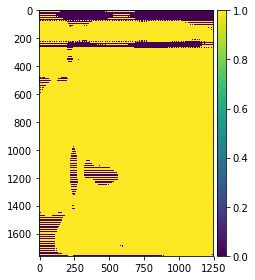

In [42]:
skimage.io.imshow(a)

/home/ivan/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


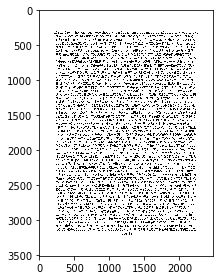

In [45]:
img = skimage.io.imread('test_img/662.jpg')
skimage.io.imshow(img)
skimage.io.imsave('temp/x.jpg', img)